In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, OrdinalEncoder

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/MasterDataScientist/entregable 1/bmw_pricing_v3.csv")

In [ ]:
df.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [ ]:
df.describe()

,km,potencia,precio
count,4.841000e+03,4842.000000,4837.000000
mean,1.409593e+05,128.981826,15831.920612
std,6.020853e+04,38.994839,9222.630708
min,-6.400000e+01,0.000000,100.000000
25%,1.028840e+05,100.000000,10800.000000
50%,1.410800e+05,120.000000,14200.000000
75%,1.752170e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


In [ ]:
corr=df.corr(numeric_only=True)

In [ ]:
corr.style.background_gradient(cmap="coolwarm")

,km,potencia,gps,precio
km,1.000000,-0.050141,0.154815,-0.410189
potencia,-0.050141,1.000000,0.008862,0.639254
gps,0.154815,0.008862,1.000000,-0.005227
precio,-0.410189,0.639254,-0.005227,1.000000


In [ ]:
#1. DUPLICADOS

len(df[df.duplicated()])

#no hay duplicados en el dataset

0

In [ ]:
#2. VALORES NULOS

df.isnull().sum()

marca                           970
modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

In [ ]:
#3. UNIVARIATE ANALYSIS - vamos a analizar cada columna

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [ ]:
#3.1. marca

df["marca"].value_counts(dropna=False)

BMW    3873
NaN     970
Name: marca, dtype: int64

In [ ]:
970/3873*100

#la proporción de nulos es del 25%, no podemos borrar los nulos.
#Como los datos vienen del estudio de BMW, podemos conciderar que solo se esta analizando este coche.
#Por lo tanto, vamos a asumir que son potencialmente BMW los nulos.
#No juntamos los nulos a la categoria BMW y mantenemos al distincion dado que en
#el estudio de la prdicción del precio se tiene que observar si ambas generan efectos distintos sobre el precio.

25.045184611412342

In [ ]:
df_2 = df.copy()

In [ ]:
df_2["marca"].fillna("Potential BMW", inplace=True)

In [ ]:
df_2.isnull().sum()

marca                             0
modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

<Axes: >

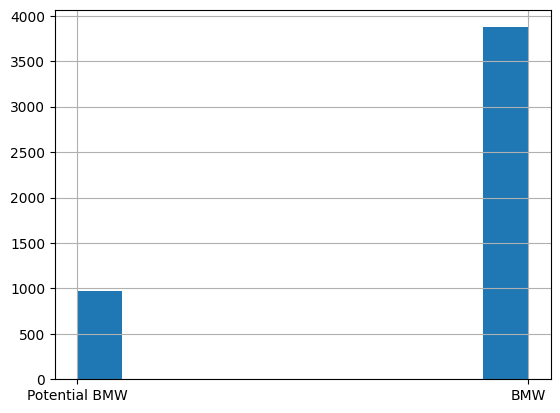

In [ ]:
df_2['marca'].hist()

In [ ]:
#3.2. modelo --> borramos los nulos ya que es un percentage bajo de la población

len(df_2["modelo"].value_counts(dropna=False))

77

In [ ]:
df_2["modelo"].value_counts()

320                752
520                633
318                568
X3                 438
116                358
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: modelo, Length: 76, dtype: int64

In [ ]:
df_2.dropna(subset=["modelo"],inplace=True)

In [ ]:
df_2.reset_index(drop=True,inplace=True)

In [ ]:
df_2.isnull().sum()

marca                             0
modelo                            0
km                                2
potencia                          1
fecha_registro                 2421
tipo_gasolina                     5
color                           445
tipo_coche                     1458
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3388
elevalunas_electrico              2
bluetooth                       727
gps                               0
alerta_lim_velocidad            727
precio                            6
fecha_venta                       1
dtype: int64

<Axes: >

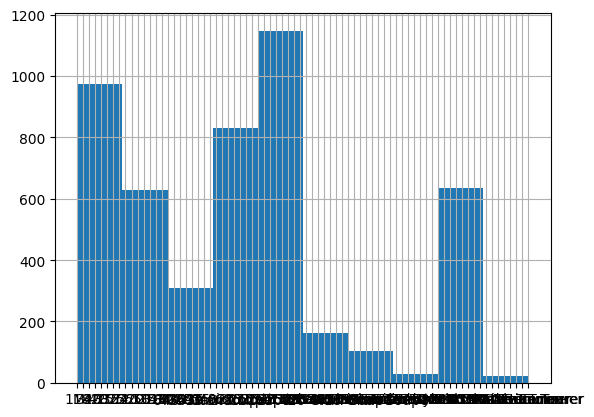

In [ ]:
df_2['modelo'].hist()

In [ ]:
#3.3. km --> borramos los nulos ya que es un percentage bajo de la población


df_2["km"].value_counts(dropna=False)

127499.0    2
129214.0    2
124822.0    2
180232.0    2
78156.0     2
           ..
96491.0     1
133178.0    1
105959.0    1
193231.0    1
195840.0    1
Name: km, Length: 4782, dtype: int64

<Axes: >

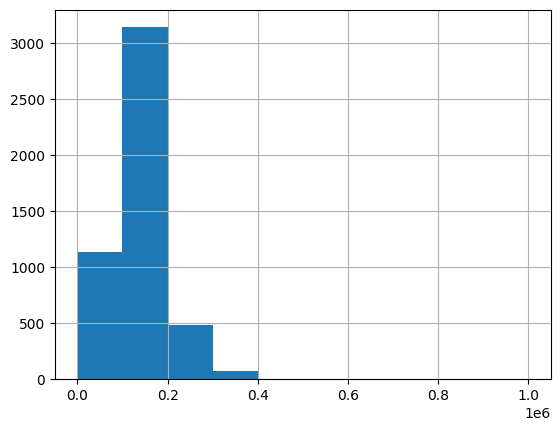

In [ ]:
df_2["km"].hist()

<Axes: >

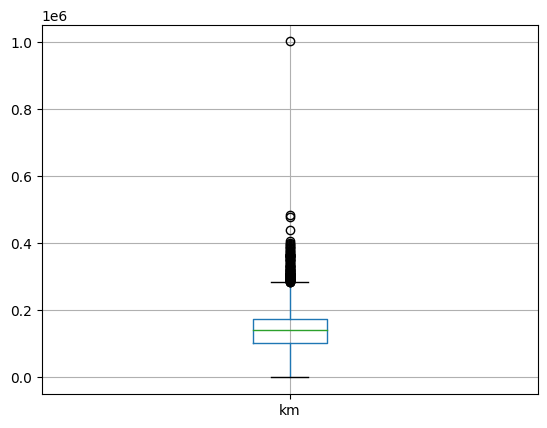

In [ ]:
df_2.boxplot('km')

In [ ]:
#para la variable km los valores superiores a 4000000 km son outliers, hay 6.

In [ ]:
df_2.dropna(subset=["km"],inplace=True)

In [ ]:
df_2.reset_index(drop=True,inplace=True)

In [ ]:
len(df_2[df_2['km']>400000]) #--> outlier

6

In [ ]:
#3.4. potencia --> borramos los nulos ya que es un percentage bajo de la población


In [ ]:
df_2.dropna(subset=["potencia"],inplace=True)

In [ ]:
df_2.reset_index(drop=True,inplace=True)

<Axes: >

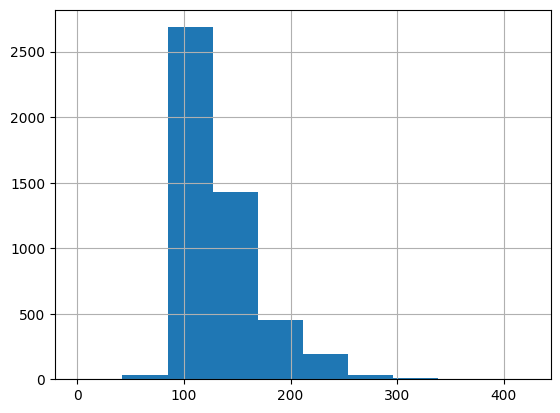

In [ ]:
df_2['potencia'].hist()

<Axes: >

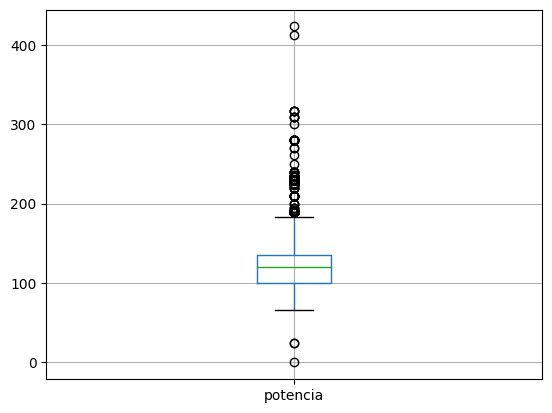

In [ ]:
df_2.boxplot('potencia')

In [ ]:
outlier_upper = len(df_2[df_2['potencia']>400])

In [ ]:
outlier_lower = len(df_2[df_2['potencia']<50])

In [ ]:
len(df_2[df_2['potencia']>200])

259

In [ ]:
#la variable potencia tiene unos 5 outliers en total, los eliminamos. Aun así,
#los datos por encima de 200 son concideraros outliers tambien, no los bprramos ya que son
#un percentaje representativo de la población, y queremos ver su efecto en el precio.

In [ ]:
df_2.drop(index=outlier_lower, inplace=True)

In [ ]:
df_2.drop(index=outlier_upper, inplace=True)

In [ ]:
df_2.reset_index(drop=True,inplace=True)

In [ ]:
#3.5. tipo_gasolina --> borramos los nulos ya que es un percentage bajo de la población

In [ ]:
df_2.dropna(subset=["tipo_gasolina"],inplace=True)

In [ ]:
df_2.reset_index(drop=True,inplace=True)

<Axes: >

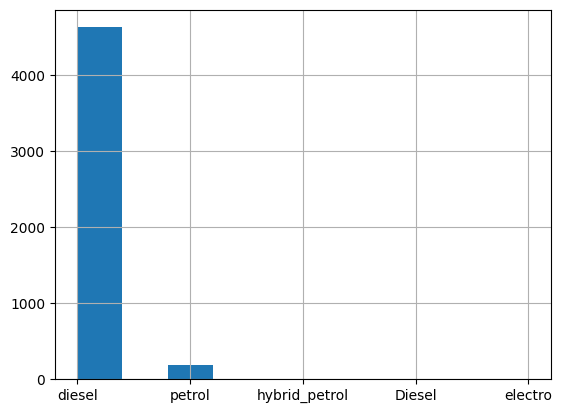

In [ ]:
df_2['tipo_gasolina'].hist()


In [ ]:
df_2['tipo_gasolina'].value_counts()

diesel           4623
petrol            191
hybrid_petrol       8
Diesel              5
electro             3
Name: tipo_gasolina, dtype: int64

In [ ]:
#las categorias hybrid_petrol, electro y Diesel son outliers, aun así, las concerbamos ya que queremos ver
#su inpacto en el precio. Las mantenemos pues tiene logica que haya un percentaje mas bajo de
#coches hybridos (dada su reciente aparición en el mercado) o electricos (por el mismo motivo)
#a parte, los coche de la amrca BMW tienden a tener motores potentes de diesel o petrol, por eso tiene logica que sean
#las categorias con mas frequencia

In [ ]:
tipo_gasolina_clean = pd.Series(df_2['tipo_gasolina'], dtype="category")

In [ ]:
#agrupamos Diesel y diesel
#df_2['tipo_gasolina_clean'] = df_2['tipo_gasolina_clean'].cat.rename_categories({'diesel': 1, 'petrol': 2, 'hybrid_petrol': 3,'Diesel': 1,'electro': 4})

In [ ]:
#3.6. volante_regulable --> borramos los nulos ya que es un percentage bajo de la población

In [ ]:
df_2.dropna(subset=["volante_regulable"],inplace=True)

In [ ]:
df_2.reset_index(drop=True,inplace=True)

In [ ]:
df_2['volante_regulable'].value_counts()

True     2658
False    2168
Name: volante_regulable, dtype: int64

In [ ]:
#la convertimos en numerica
df_2["volante_regulable_INT"]=le.fit_transform(df_2["volante_regulable"])

In [ ]:
df_2.drop(['volante_regulable'], axis = 1, inplace = True)

In [ ]:
#3.7. camara_trasera --> borramos los nulos ya que es un percentage bajo de la población

In [ ]:
df_2.dropna(subset=["camara_trasera"],inplace=True)

In [ ]:
df_2.reset_index(drop=True,inplace=True)

In [ ]:
df_2['camara_trasera'].value_counts()

False    3849
True      975
Name: camara_trasera, dtype: int64

In [ ]:
#la convertimos en numerica
df_2["camara_trasera_INT"]=le.fit_transform(df_2["camara_trasera"])

In [ ]:
df_2.drop(['camara_trasera'], axis = 1, inplace = True)

In [ ]:
#3.8. elevalunas_electrico --> borramos los nulos ya que es un percentage bajo de la población

In [ ]:
df_2.dropna(subset=["elevalunas_electrico"],inplace=True)

In [ ]:
df_2.reset_index(drop=True,inplace=True)

In [ ]:
df_2['elevalunas_electrico'].value_counts()

False    2602
True     2220
Name: elevalunas_electrico, dtype: int64

In [ ]:
df_2["elevalunas_electrico_INT"]=le.fit_transform(df_2["elevalunas_electrico"])

In [ ]:
df_2.drop(['elevalunas_electrico'], axis = 1, inplace = True)

In [ ]:
#3.9. precio --> borramos los nulos ya que es un percentage bajo de la población

In [ ]:
df_2.dropna(subset=["precio"],inplace=True)

In [ ]:
df_2.reset_index(drop=True,inplace=True)

<Axes: >

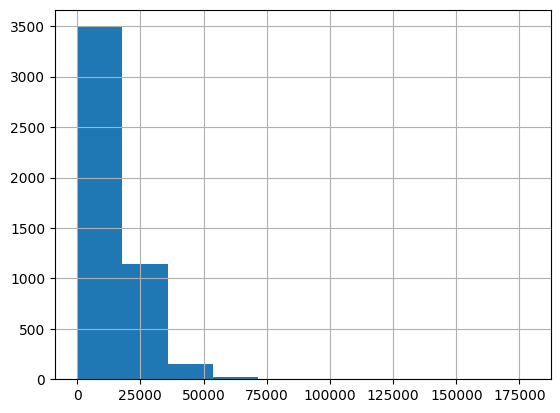

In [ ]:
df_2['precio'].hist()

In [ ]:
#3.10. fecha_venta --> borramos los nulos ya que es un percentage bajo de la población

In [ ]:
df_2.dropna(subset=["fecha_venta"],inplace=True)

In [ ]:
df_2.reset_index(drop=True,inplace=True)

In [ ]:
df_2.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,aire_acondicionado,asientos_traseros_plegables,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,volante_regulable_INT,camara_trasera_INT,elevalunas_electrico_INT
0,Potential BMW,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,NaN,NaN,True,NaN,11300.0,2018-01-01,1,0,1
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,NaN,True,True,True,69700.0,2018-02-01,1,0,0
2,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,False,True,True,True,33400.0,2018-04-01,1,0,0
3,BMW,335,152352.0,225.0,2011-05-01,petrol,black,NaN,True,False,True,True,True,17100.0,2018-02-01,1,0,1
4,BMW,325,205219.0,145.0,NaN,diesel,grey,convertible,True,NaN,True,True,True,12400.0,2018-02-01,1,0,1


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        4815 non-null   object 
 1   modelo                       4815 non-null   object 
 2   km                           4815 non-null   float64
 3   potencia                     4815 non-null   float64
 4   fecha_registro               2407 non-null   object 
 5   tipo_gasolina                4815 non-null   object 
 6   color                        4373 non-null   object 
 7   tipo_coche                   3367 non-null   object 
 8   aire_acondicionado           4333 non-null   object 
 9   asientos_traseros_plegables  1444 non-null   object 
 10  bluetooth                    4090 non-null   object 
 11  gps                          4815 non-null   bool   
 12  alerta_lim_velocidad         4091 non-null   object 
 13  precio            

In [ ]:
df_2['fecha_venta'] = pd.to_datetime(df_2['fecha_venta'])

In [ ]:

for col in ['fecha_venta']:
    df_2[col + '_DIA'] = df_2[col].dt.day
    df_2[col + '_MES'] = df_2[col].dt.month
    df_2[col + '_ANYO'] = df_2[col].dt.year
    del df_2[col]

df_2.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,aire_acondicionado,asientos_traseros_plegables,bluetooth,gps,alerta_lim_velocidad,precio,volante_regulable_INT,camara_trasera_INT,elevalunas_electrico_INT,fecha_venta_DIA,fecha_venta_MES,fecha_venta_ANYO
0,Potential BMW,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,NaN,NaN,True,NaN,11300.0,1,0,1,1,1,2018
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,NaN,True,True,True,69700.0,1,0,0,1,2,2018
2,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,False,True,True,True,33400.0,1,0,0,1,4,2018
3,BMW,335,152352.0,225.0,2011-05-01,petrol,black,NaN,True,False,True,True,True,17100.0,1,0,1,1,2,2018
4,BMW,325,205219.0,145.0,NaN,diesel,grey,convertible,True,NaN,True,True,True,12400.0,1,0,1,1,2,2018


In [ ]:
percentage_delated_entries = (len(df_2)-len(df))/len(df)*100
percentage_delated_entries

# 0,5% --> OK

-0.5781540367540781

In [ ]:
df_2.isnull().sum()

marca                             0
modelo                            0
km                                0
potencia                          0
fecha_registro                 2408
tipo_gasolina                     0
color                           442
tipo_coche                     1448
aire_acondicionado              482
asientos_traseros_plegables    3371
bluetooth                       725
gps                               0
alerta_lim_velocidad            724
precio                            0
volante_regulable_INT             0
camara_trasera_INT                0
elevalunas_electrico_INT          0
fecha_venta_DIA                   0
fecha_venta_MES                   0
fecha_venta_ANYO                  0
dtype: int64

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        4815 non-null   object 
 1   modelo                       4815 non-null   object 
 2   km                           4815 non-null   float64
 3   potencia                     4815 non-null   float64
 4   fecha_registro               2407 non-null   object 
 5   tipo_gasolina                4815 non-null   object 
 6   color                        4373 non-null   object 
 7   tipo_coche                   3367 non-null   object 
 8   aire_acondicionado           4333 non-null   object 
 9   asientos_traseros_plegables  1444 non-null   object 
 10  bluetooth                    4090 non-null   object 
 11  gps                          4815 non-null   bool   
 12  alerta_lim_velocidad         4091 non-null   object 
 13  precio            

In [ ]:
#3.10. asientos_traseros_plegables

#borramos la variable asientos_traseros_plegables ya que nos un 70% de los datos son nulos,
#la manipulacion de los nulos (es decir, borrarlos o crear una categoria para ellos, generaria mucha distorcion en nuestro data set)

3373/4816

0.7003737541528239

In [ ]:
df_2["asientos_traseros_plegables"].value_counts()

False    1143
True      301
Name: asientos_traseros_plegables, dtype: int64

In [ ]:
#copia
df_3 = df_2.copy()

In [ ]:
df_3.drop(['asientos_traseros_plegables'], axis = 1, inplace = True)

In [ ]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   marca                     4815 non-null   object 
 1   modelo                    4815 non-null   object 
 2   km                        4815 non-null   float64
 3   potencia                  4815 non-null   float64
 4   fecha_registro            2407 non-null   object 
 5   tipo_gasolina             4815 non-null   object 
 6   color                     4373 non-null   object 
 7   tipo_coche                3367 non-null   object 
 8   aire_acondicionado        4333 non-null   object 
 9   bluetooth                 4090 non-null   object 
 10  gps                       4815 non-null   bool   
 11  alerta_lim_velocidad      4091 non-null   object 
 12  precio                    4815 non-null   float64
 13  volante_regulable_INT     4815 non-null   int64  
 14  camara_t

In [ ]:
#3.11. bluetooth

df_3.value_counts('bluetooth')

bluetooth
False    3100
True      990
dtype: int64

In [ ]:
df_3.value_counts('bluetooth')

bluetooth
False    3100
True      990
dtype: int64

In [ ]:
le = LabelEncoder()

In [ ]:
df_3["bluetooth_INT"]=le.fit_transform(df_3["bluetooth"])

In [ ]:
df_3.value_counts('bluetooth_INT')

#la categoria 2 es "no definido si tiene bluetooth"

bluetooth_INT
0    3100
1     990
2     725
dtype: int64

In [ ]:
df_3.isnull().sum()

marca                          0
modelo                         0
km                             0
potencia                       0
fecha_registro              2408
tipo_gasolina                  0
color                        442
tipo_coche                  1448
aire_acondicionado           482
bluetooth                    725
gps                            0
alerta_lim_velocidad         724
precio                         0
volante_regulable_INT          0
camara_trasera_INT             0
elevalunas_electrico_INT       0
fecha_venta_DIA                0
fecha_venta_MES                0
fecha_venta_ANYO               0
bluetooth_INT                  0
dtype: int64

In [ ]:
df_3["bluetooth_INT"].fillna("not known",inplace=True)

In [ ]:
df_3.isnull().sum()

marca                          0
modelo                         0
km                             0
potencia                       0
fecha_registro              2408
tipo_gasolina                  0
color                        442
tipo_coche                  1448
aire_acondicionado           482
bluetooth                    725
gps                            0
alerta_lim_velocidad         724
precio                         0
volante_regulable_INT          0
camara_trasera_INT             0
elevalunas_electrico_INT       0
fecha_venta_DIA                0
fecha_venta_MES                0
fecha_venta_ANYO               0
bluetooth_INT                  0
dtype: int64

In [ ]:
df_3.value_counts('bluetooth_INT')

bluetooth_INT
0    3100
1     990
2     725
dtype: int64

In [ ]:
#borramos la coulumna bluetooth
df_3.drop(['bluetooth'], axis = 1, inplace = True)

In [ ]:
df_3.isnull().sum()

marca                          0
modelo                         0
km                             0
potencia                       0
fecha_registro              2408
tipo_gasolina                  0
color                        442
tipo_coche                  1448
aire_acondicionado           482
gps                            0
alerta_lim_velocidad         724
precio                         0
volante_regulable_INT          0
camara_trasera_INT             0
elevalunas_electrico_INT       0
fecha_venta_DIA                0
fecha_venta_MES                0
fecha_venta_ANYO               0
bluetooth_INT                  0
dtype: int64

In [ ]:
#3.12. alerta_lim_velocidad
df_3.value_counts('alerta_lim_velocidad')

alerta_lim_velocidad
True     2226
False    1865
dtype: int64

In [ ]:
df_3["alerta_lim_velocidad_INT"]=le.fit_transform(df_3["alerta_lim_velocidad"])

In [ ]:
df_3["alerta_lim_velocidad_INT"].fillna("not known",inplace=True) #--> creamos categoria 2 que son los valores no conocidos

In [ ]:
df_3.value_counts('alerta_lim_velocidad_INT')

alerta_lim_velocidad_INT
1    2226
0    1865
2     724
dtype: int64

In [ ]:
#borramos la coulumna alerta_lim_velocidad
df_3.drop(['alerta_lim_velocidad'], axis = 1, inplace = True)

In [ ]:
df_3.isnull().sum()

marca                          0
modelo                         0
km                             0
potencia                       0
fecha_registro              2408
tipo_gasolina                  0
color                        442
tipo_coche                  1448
aire_acondicionado           482
gps                            0
precio                         0
volante_regulable_INT          0
camara_trasera_INT             0
elevalunas_electrico_INT       0
fecha_venta_DIA                0
fecha_venta_MES                0
fecha_venta_ANYO               0
bluetooth_INT                  0
alerta_lim_velocidad_INT       0
dtype: int64

In [ ]:
#3.13. aire_acondicionado

df_3['aire_acondicionado'].value_counts()

True     3448
False     885
Name: aire_acondicionado, dtype: int64

In [ ]:
df_3["aire_acondicionado_INT"]=le.fit_transform(df_3["aire_acondicionado"])

In [ ]:
df_3["aire_acondicionado_INT"].fillna("not known",inplace=True)

In [ ]:
df_3.value_counts('aire_acondicionado_INT')

aire_acondicionado_INT
1    3448
0     885
2     482
dtype: int64

In [ ]:
df_3.drop(['aire_acondicionado'], axis = 1, inplace = True)

In [ ]:
#3.14. color

df_3['color'].value_counts()

black     1489
grey      1067
blue       643
white      479
brown      302
silver     290
red         46
beige       37
green       14
orange       6
Name: color, dtype: int64

In [ ]:
df_3["color"].fillna("not known",inplace=True)

In [ ]:
df_3['color'].value_counts()

black        1489
grey         1067
blue          643
white         479
not known     442
brown         302
silver        290
red            46
beige          37
green          14
orange          6
Name: color, dtype: int64

In [ ]:
df_4 = df_3.copy()

In [ ]:
#3.15. tipo_coche

df_4['tipo_coche'].value_counts()

estate         1097
sedan           821
suv             754
hatchback       488
subcompact       77
coupe            73
convertible      29
van              28
Name: tipo_coche, dtype: int64

In [ ]:
df_4["tipo_coche"].fillna("not known",inplace=True)

In [ ]:
#3.16. fecha_registro

df_4['fecha_registro'].value_counts()

2013-07-01    93
2014-03-01    83
2014-05-01    80
2013-10-01    76
2013-01-01    76
              ..
2007-01-01     1
1990-03-01     1
2006-11-01     1
1994-01-01     1
2005-09-01     1
Name: fecha_registro, Length: 180, dtype: int64

In [ ]:
df_4["fecha_registro"].fillna("not known",inplace=True)



In [ ]:
df_4.isnull().sum()

marca                       0
modelo                      0
km                          0
potencia                    0
fecha_registro              0
tipo_gasolina               0
color                       0
tipo_coche                  0
gps                         0
precio                      0
volante_regulable_INT       0
camara_trasera_INT          0
elevalunas_electrico_INT    0
fecha_venta_DIA             0
fecha_venta_MES             0
fecha_venta_ANYO            0
bluetooth_INT               0
alerta_lim_velocidad_INT    0
aire_acondicionado_INT      0
dtype: int64

In [ ]:
# clean dataset


df_5 = df_4.copy()

In [ ]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   marca                     4815 non-null   object 
 1   modelo                    4815 non-null   object 
 2   km                        4815 non-null   float64
 3   potencia                  4815 non-null   float64
 4   fecha_registro            4815 non-null   object 
 5   tipo_gasolina             4815 non-null   object 
 6   color                     4815 non-null   object 
 7   tipo_coche                4815 non-null   object 
 8   gps                       4815 non-null   bool   
 9   precio                    4815 non-null   float64
 10  volante_regulable_INT     4815 non-null   int64  
 11  camara_trasera_INT        4815 non-null   int64  
 12  elevalunas_electrico_INT  4815 non-null   int64  
 13  fecha_venta_DIA           4815 non-null   int64  
 14  fecha_ve

In [ ]:
#proporción de datos perdidios durante el data cleaning; 0,53% --> OK

(1-(len(df_5)/len(df)))*100

0.578154036754075

In [ ]:
df_5.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,gps,precio,volante_regulable_INT,camara_trasera_INT,elevalunas_electrico_INT,fecha_venta_DIA,fecha_venta_MES,fecha_venta_ANYO,bluetooth_INT,alerta_lim_velocidad_INT,aire_acondicionado_INT
0,Potential BMW,118,140411.0,100.0,2012-02-01,diesel,black,not known,True,11300.0,1,0,1,1,1,2018,2,2,1
1,BMW,M4,13929.0,317.0,not known,petrol,grey,convertible,True,69700.0,1,0,0,1,2,2018,1,1,1
2,BMW,425,97097.0,160.0,not known,diesel,silver,not known,True,33400.0,1,0,0,1,4,2018,1,1,1
3,BMW,335,152352.0,225.0,2011-05-01,petrol,black,not known,True,17100.0,1,0,1,1,2,2018,1,1,1
4,BMW,325,205219.0,145.0,not known,diesel,grey,convertible,True,12400.0,1,0,1,1,2,2018,1,1,1


In [ ]:
corr_2=df_5.corr(numeric_only=True)

In [ ]:
corr_2.style.background_gradient(cmap="coolwarm")

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,km,potencia,gps,precio,volante_regulable_INT,camara_trasera_INT,elevalunas_electrico_INT,fecha_venta_DIA,fecha_venta_MES,fecha_venta_ANYO,bluetooth_INT,alerta_lim_velocidad_INT,aire_acondicionado_INT
km,1.000000,-0.049749,0.155130,-0.409732,0.065988,0.001789,0.046895,nan,0.000647,-0.032456,0.000990,-0.032469,0.018517
potencia,-0.049749,1.000000,0.008303,0.639002,0.327290,0.312806,0.342316,nan,-0.027819,-0.001711,0.133120,0.290585,0.134142
gps,0.155130,0.008303,1.000000,-0.008738,0.242739,0.060829,0.202028,nan,0.061994,-0.007704,0.073256,-0.027455,0.249816
precio,-0.409732,0.639002,-0.008738,1.000000,0.267589,0.251710,0.261007,nan,0.012796,0.013978,0.122619,0.265721,0.150980
volante_regulable_INT,0.065988,0.327290,0.242739,0.267589,1.000000,0.253093,0.277956,nan,0.080885,-0.000131,0.070924,0.129931,0.199773
camara_trasera_INT,0.001789,0.312806,0.060829,0.251710,0.253093,1.000000,0.198815,nan,0.019622,0.014383,0.093782,0.114808,0.122202
elevalunas_electrico_INT,0.046895,0.342316,0.202028,0.261007,0.277956,0.198815,1.000000,nan,-0.022842,-0.002273,0.136693,0.209774,0.181771
fecha_venta_DIA,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
fecha_venta_MES,0.000647,-0.027819,0.061994,0.012796,0.080885,0.019622,-0.022842,nan,1.000000,-0.009939,-0.008562,-0.018824,0.017840
fecha_venta_ANYO,-0.032456,-0.001711,-0.007704,0.013978,-0.000131,0.014383,-0.002273,nan,-0.009939,1.000000,0.019548,-0.017381,-0.018876


In [ ]:
df_raquel = pd.to_pickle(df_5,"/content/drive/MyDrive/MasterDataScientist/entregable 1/df_final")